In [ ]:
#OLS - objective least squares

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import scikit.learn as skl
%matplotlib inline
plt.style.use("fivethirtyeight")

ModuleNotFoundError: No module named 'scikit'

In [6]:
#data = pd.read_csv('C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/advertising.csv', index_col=0)
url = 'C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
#changes count column to total rentals

bikes.rename(columns={'count':'total_rentals'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


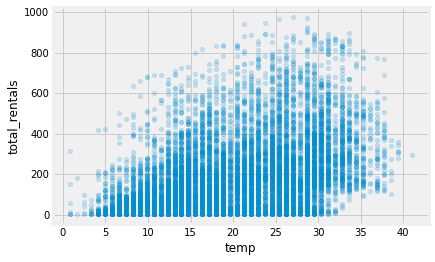

In [9]:
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);

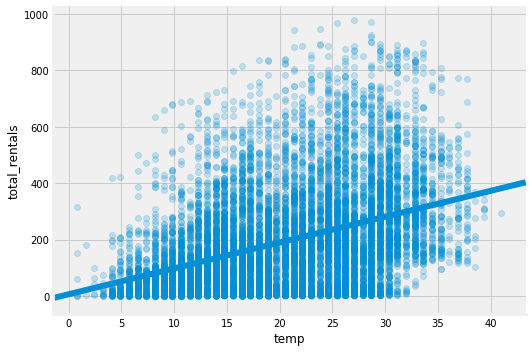

In [14]:
#line of best fit in seaborn

sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

In [64]:
#Linear Regression
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [21]:
#x and y is a numpy array

print(type(X))
print(type(X.values))

print(type(y))
print(type(y.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [22]:
print(X.shape)
print(y.shape)

(10886, 1)
(10886,)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [25]:
#help(lr)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lr.intercept_

6.046212959616781

In [49]:
lr.coef_

array([9.17054048])

In [42]:
lr.predict(np.array([0]).reshape(1,-1))

array([6.04621296])

In [66]:
#returns NumPy array of multiple predictions

X_new = [[0],[1],[25], [10], [100]]
lr.predict(X_new)

array([  6.04621296,  15.21675344, 235.309725  ,  97.75161777,
       923.1002611 ])

In [52]:
print(lr.intercept_)
print(lr.coef_)

6.046212959616781
[9.17054048]


In [88]:
# Create a new column for Fahrenheit temperature.
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


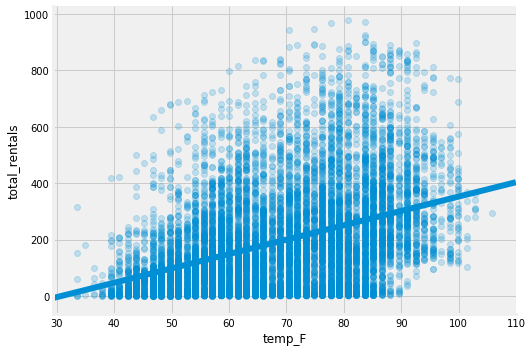

In [54]:
sns.lmplot(x='temp_F', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

In [89]:
# Create X and y.
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lr = LinearRegression()
lr.fit(X, y)

# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

-156.98561782129445
[5.09474471]


In [90]:
lr.predict(np.array([77]).reshape(-1, 1))

array([235.309725])

In [95]:
bikes.drop('temp_F', axis=1, inplace=True)

In [100]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity']

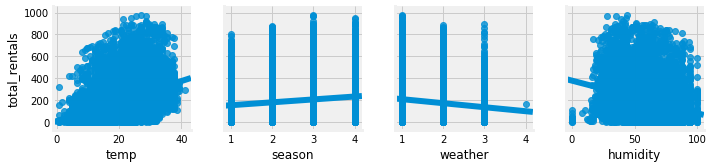

In [99]:
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

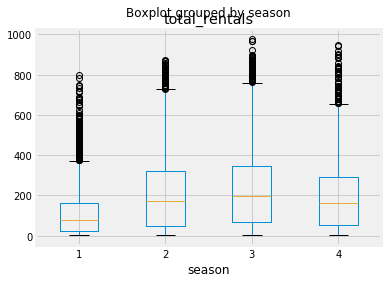

In [58]:
bikes.boxplot(column='total_rentals', by='season');

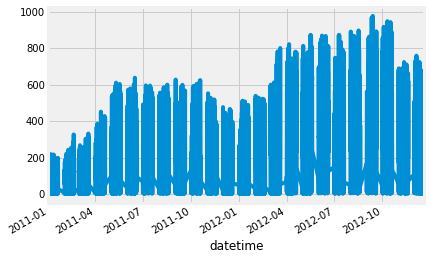

In [59]:
bikes.total_rentals.plot();

In [60]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.258689
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.000295
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.029966
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.055035
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,1.000000
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.984948
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.064949
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.017852
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.467097
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.318571


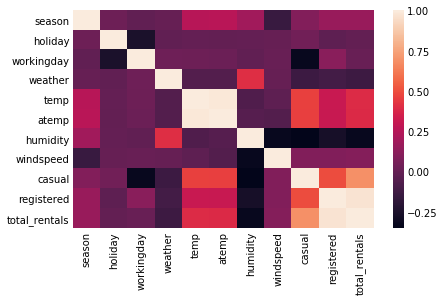

In [67]:
sns.heatmap(bikes.corr())

In [92]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [108]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lr = LinearRegression()
lr.fit(X, y)

# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

159.52068786129817
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [109]:
#r**2 value

lr.score(X,y)

0.2582975832728214

In [71]:
# Pair the feature names with the coefficients.
#use "zip" to pair

list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477439),
 ('season', 22.53875753246676),
 ('weather', 6.670302035923719),
 ('humidity', -3.118873382396501)]

            temp     atemp    casual
temp    1.000000  0.984948  0.467097
atemp   0.984948  1.000000  0.462067
casual  0.467097  0.462067  1.000000
AxesSubplot(0.08,0.125;0.696x0.755)


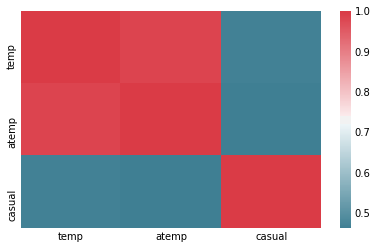

In [72]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [77]:
#with both temp and "feels like temp"
feature_cols = ['temp', 'atemp']

In [75]:
#with only temp
feature_cols = ['temp']

In [93]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lr = LinearRegression()
lr.fit(X, y)

# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

159.52068786129817
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [94]:
# Calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

NameError: name 'true' is not defined